In [1]:
# knee
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
df = pd.read_csv("mall customers.csv") # read csv file

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.rename(columns={'Annual Income (k$)':'income','Age':'age','Spending Score (1-100)':'score','Gender':'gender'}, inplace=True)
# rename columns
# inplace True means rename columns permanently

In [6]:
df.head()

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df = df.drop('CustomerID',axis = 1) # drop 'customer' column
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.to_csv('new.csv') # create new csv

In [9]:
df.describe() # descriptive statistics

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
df.age.std() #standard deviation 'age' column
# same value for age in describe and separate manually

13.969007331558883

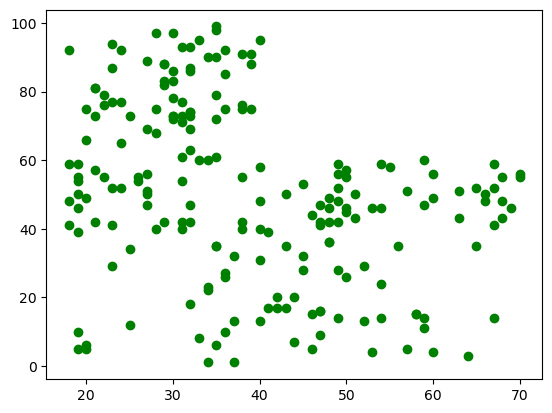

In [11]:
#visulization of age and score
plt.scatter(df.age, df.score, color='Green')

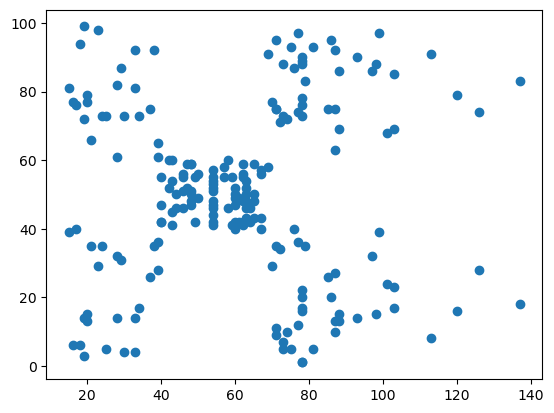

In [12]:
#visulization of income and score
plt.scatter(df.income, df.score)

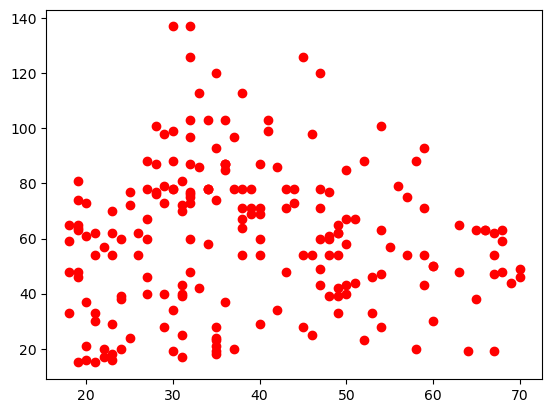

In [13]:
#visulization
plt.scatter(df.age, df.income, color = 'Red')

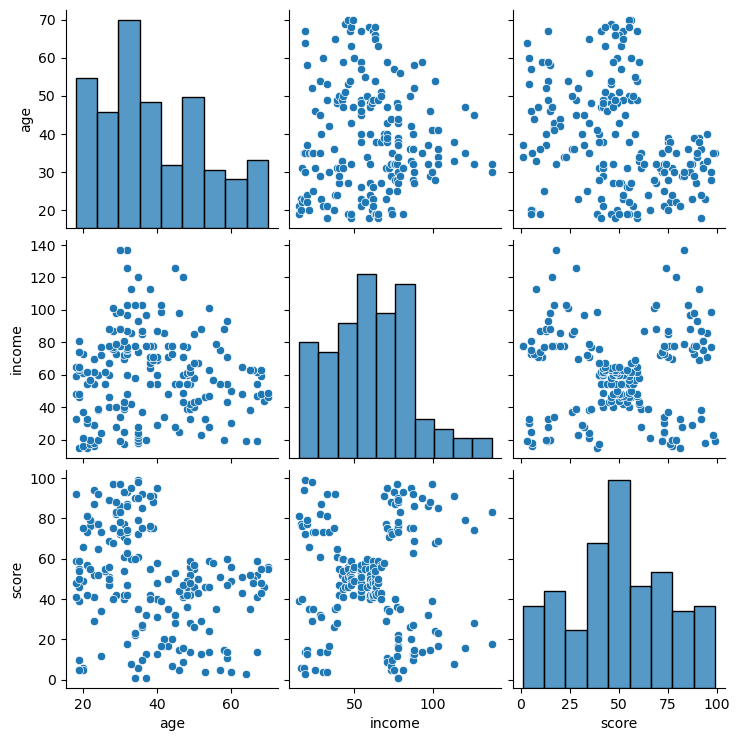

In [22]:
# pairplot
import seaborn as sns
sns.pairplot(df[['age', 'income', 'score']])

# KMeans Cluster

In [24]:
import sklearn.cluster as cluster

In [25]:
kmeans = cluster.KMeans() # create an object
#

In [26]:
predicted = kmeans.fit_predict(df[['age','income']]) # fit and predict
predicted

array([3, 3, 3, 3, 3, 3, 3, 3, 7, 3, 7, 3, 7, 3, 3, 3, 3, 3, 7, 3, 3, 3,
       7, 3, 7, 3, 7, 3, 3, 3, 7, 3, 7, 3, 7, 3, 7, 3, 3, 3, 7, 3, 7, 3,
       7, 3, 7, 3, 3, 3, 7, 3, 1, 7, 7, 7, 7, 0, 1, 7, 0, 1, 0, 0, 0, 1,
       5, 0, 1, 1, 0, 5, 0, 0, 0, 1, 5, 5, 1, 5, 0, 5, 0, 5, 1, 5, 5, 1,
       1, 5, 0, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 5, 0, 1, 5, 1, 0, 5, 0, 0,
       0, 1, 5, 1, 1, 1, 0, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 4])

In [27]:
df['cluster_1'] = predicted # assign value in 'cluster_1'

In [28]:
df.head(10)

,gender,age,income,score,cluster_1
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3
5,Female,22,17,76,3
6,Female,35,18,6,3
7,Female,23,18,94,3
8,Male,64,19,3,7
9,Female,30,19,72,3


In [29]:
df.tail(10)

,gender,age,income,score,cluster_1
190,Female,34,103,23,2
191,Female,32,103,69,2
192,Male,33,113,8,4
193,Female,38,113,91,4
194,Female,47,120,16,4
195,Female,35,120,79,4
196,Female,45,126,28,4
197,Male,32,126,74,4
198,Male,32,137,18,4
199,Male,30,137,83,4


In [30]:
center = kmeans.cluster_centers_ # value of center

In [31]:
center

array([[ 64.57894737,  54.15789474],
       [ 23.39130435,  56.47826087],
       [ 38.21428571,  93.        ],
       [ 27.63888889,  26.77777778],
       [ 36.5       , 124.        ],
       [ 48.12      ,  60.92      ],
       [ 33.35      ,  74.8       ],
       [ 52.9047619 ,  33.76190476]])

In [32]:
df0 = df[df.cluster_1 == 0]
df1 = df[df.cluster_1 == 1]
df2 = df[df.cluster_1 == 2]
df3 = df[df.cluster_1 == 3]
df4 = df[df.cluster_1 == 4]
df5 = df[df.cluster_1 == 5]
df6 = df[df.cluster_1 == 6]
df7 = df[df.cluster_1 == 7]

In [33]:
df0.shape

(19, 5)

In [34]:
df1.shape

(23, 5)

In [35]:
df2.shape

(28, 5)

In [36]:
df3.shape

(36, 5)

In [37]:
df4.shape

(8, 5)

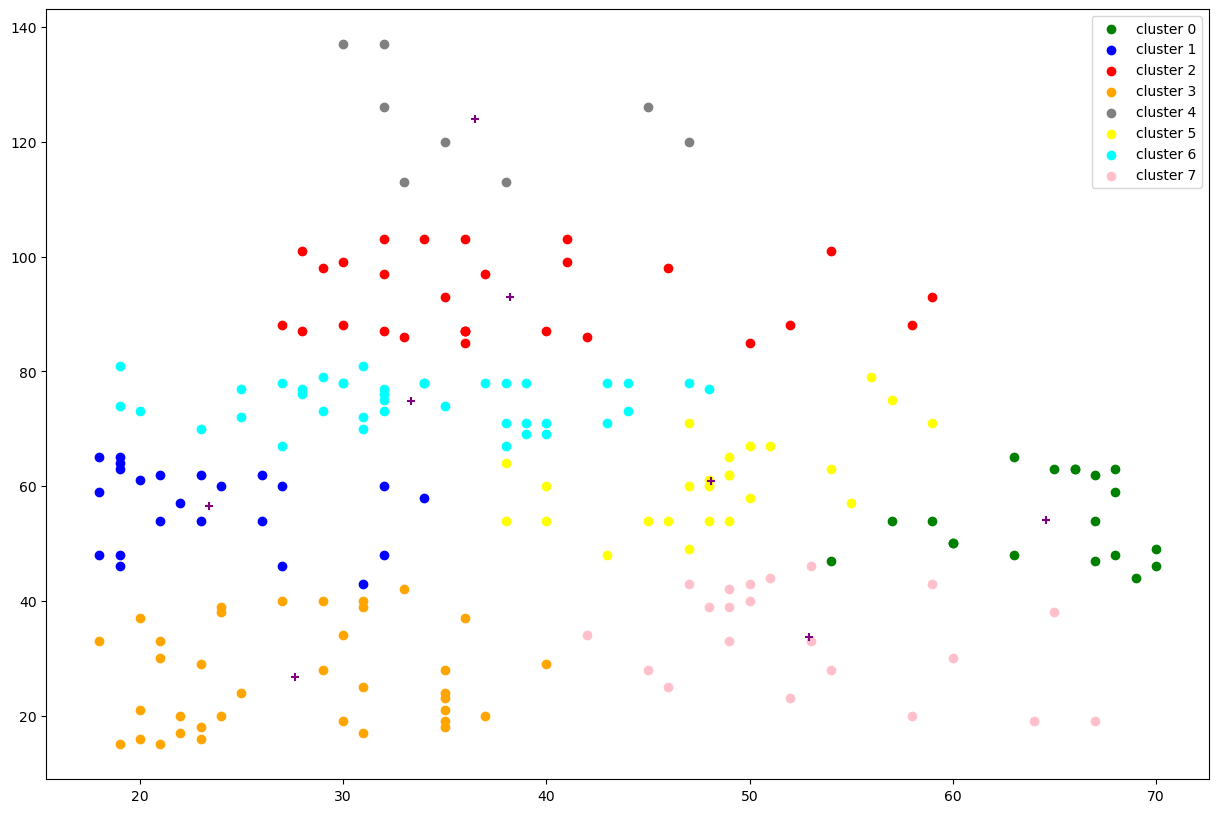

In [39]:
plt.figure(figsize=(15,10)) #figure size
plt.scatter(df0['age'], df0['income'], color='green', label='cluster 0')
plt.scatter(df1['age'], df1['income'], color='blue', label='cluster 1')
plt.scatter(df2['age'], df2['income'], color='red', label='cluster 2')
plt.scatter(df3['age'], df3['income'], color='orange', label='cluster 3')
plt.scatter(df4['age'], df4['income'], color='gray', label='cluster 4')
plt.scatter(df5['age'], df5['income'], color='yellow', label='cluster 5')
plt.scatter(df6['age'], df6['income'], color='cyan', label='cluster 6')
plt.scatter(df7['age'], df7['income'], color='pink', label='cluster 7')

plt.scatter(center[:,0] , center[:,1], color='purple', marker='+') # centeriod 

plt.legend()
'''A legend is an area describing the elements of the graph.
In the matplotlib library, there’s a function called legend()
which is used to Place a legend on the axes.'''

# Select Optimal Number of Cluster


In [40]:
wcss = [] # Within-Cluster Sum of Square
clusters = range(1,15)
for i in clusters:
    km = cluster.KMeans(n_clusters = i)
    km.fit(df[['age','income']])
    wcss.append(km.inertia_)
# inertia is a key word. it calculate the wcss value

In [41]:
wcss

[176108.77999999997,
 87121.56591478696,
 59486.96143928035,
 39529.8879673635,
 31731.901575216336,
 25399.022004416984,
 21905.43244819313,
 18914.648345468413,
 16276.283497776061,
 13743.311520448364,
 12264.553845436656,
 11264.62958664143,
 10196.895156958624,
 9134.027703875072]

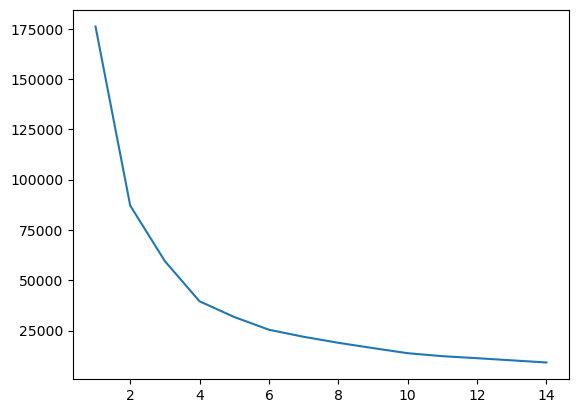

In [42]:
plt.plot(clusters,wcss) # x= clusters , y = wcss

In [43]:
from kneed import KneeLocator
kn = KneeLocator(clusters, wcss, curve = "convex", direction = "decreasing")

In [46]:
kn.knee # optimal number of cluster

4

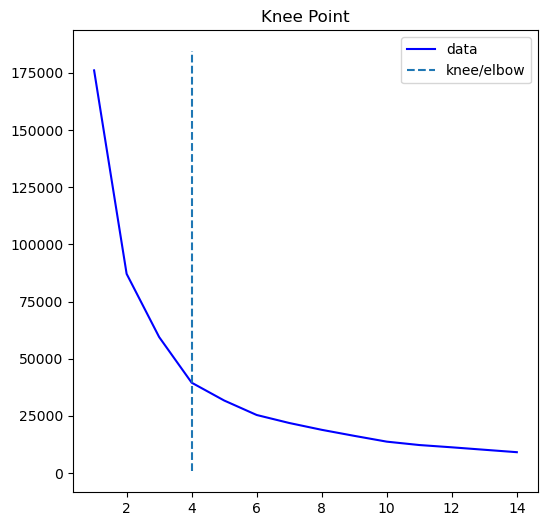

In [47]:
kn.plot_knee()

In [48]:
kmeans2 = cluster.KMeans(n_clusters=5) # default, n_clusters=5
predicted2 = kmeans2.fit_predict(df[['age','income']])

In [49]:
df['finalcluster'] = df['cluster_1']

In [50]:
df.drop(['finalcluster', 'cluster_1'], axis=1, inplace=True)

In [51]:
df['new_cluster'] = predicted2

In [52]:
df.head(10)

,gender,age,income,score,new_cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
5,Female,22,17,76,1
6,Female,35,18,6,1
7,Female,23,18,94,1
8,Male,64,19,3,2
9,Female,30,19,72,1


In [53]:
center2 = kmeans2.cluster_centers_
center2

array([[ 38.25862069,  78.15517241],
       [ 29.53658537,  27.24390244],
       [ 56.62      ,  48.48      ],
       [ 36.6       , 109.7       ],
       [ 25.06451613,  59.48387097]])

In [57]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]
df5 = df[df.new_cluster == 5]
df6 = df[df.new_cluster == 6]
df7 = df[df.new_cluster == 7]

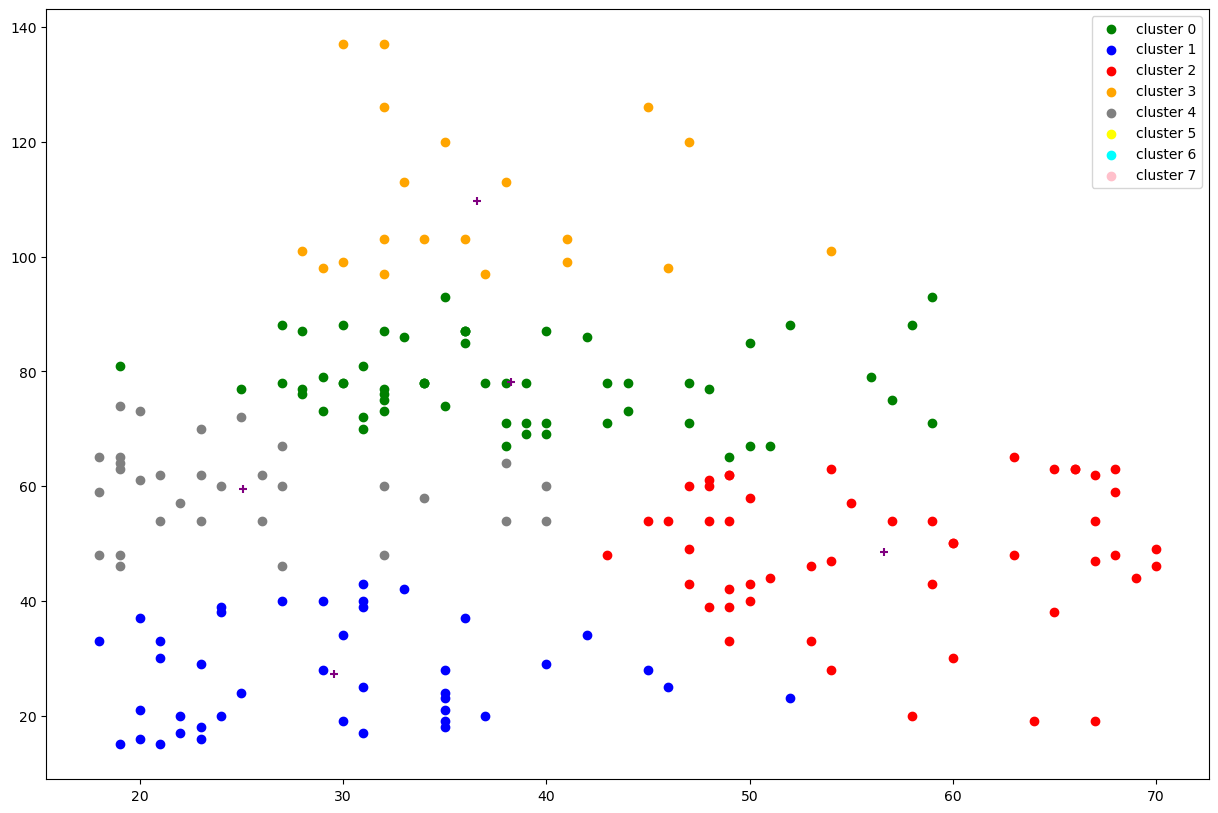

In [60]:
plt.figure(figsize=(15,10))
plt.scatter(df0['age'], df0['income'], color='green', label='cluster 0')
plt.scatter(df1['age'], df1['income'], color='blue', label='cluster 1')
plt.scatter(df2['age'], df2['income'], color='red', label='cluster 2')
plt.scatter(df3['age'], df3['income'], color='orange', label='cluster 3')
plt.scatter(df4['age'], df4['income'], color='gray', label='cluster 4')
plt.scatter(df5['age'], df5['income'], color='yellow', label='cluster 5')
plt.scatter(df6['age'], df6['income'], color='cyan', label='cluster 6')
plt.scatter(df7['age'], df7['income'], color='pink', label='cluster 7')

plt.scatter(center2[:,0] , center2[:,1], color='purple', marker='+')

plt.legend()

In [63]:
kmeans2.predict([[15,10]])
 # it will show the number of cluster where i give the point

array([1])